<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>AdaBoost Classification</b></p>

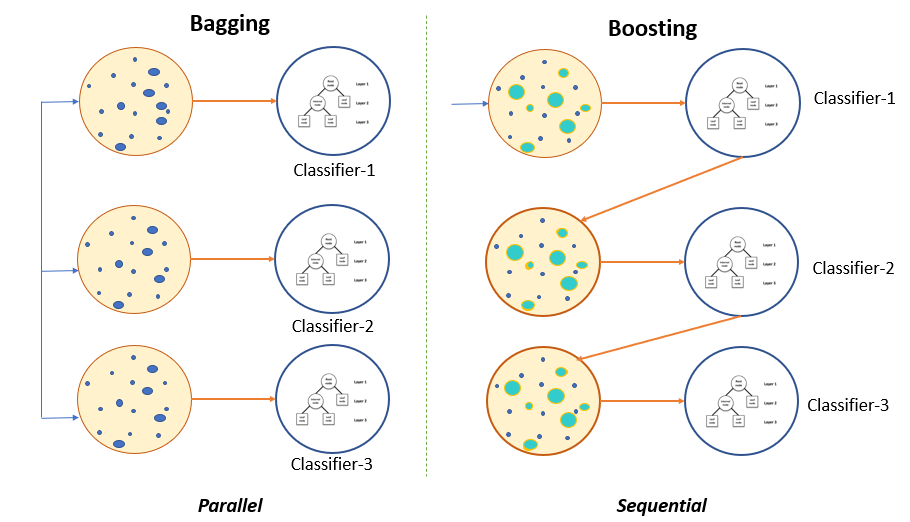

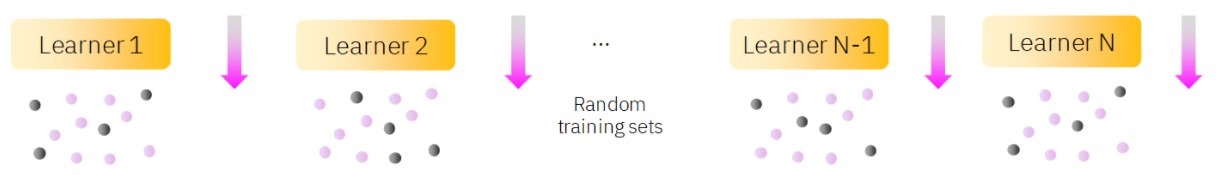
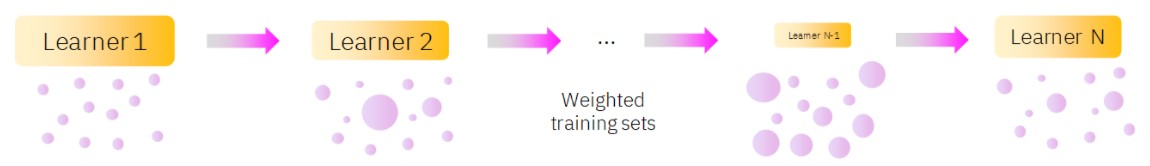

**About Dataset**

Machine Learning Model to Predict Clicks on Ads

* **Daily Time Spent on Site**: consumer time on site in minutes
* **Age**: cutomer age in years
* **Area Income**: Avg. Income of geographical area of consumer
* **Daily Internet Usage**: Avg. minutes a day consumer is on the internet
* **Ad Topic Line**: Headline of the advertisement
* **City**: City of consumer
* **Male**: Whether or not consumer was male
* **Country**: Country of consumer
* **Timestamp**: Time at which consumer clicked on Ad or closed window
* **Clicked on Ad**: 0 or 1 indicated clicking on Ad

# <font color='orange'> <b>Importing Libraries</b><font color='black'>  

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='orange'> <b>Loading The Dataset</b><font color='black'>  

In [112]:
df = pd.read_csv("advertising2.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [113]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
68,75.74,25,61005.87,215.25,Ergonomic multi-state structure,New Sheila,1,Tunisia,2016-01-16 11:35:01,0
625,67.91,23,55002.05,146.80,Re-engineered non-volatile neural-net,Hubbardmouth,1,Latvia,2016-01-12 03:28:31,1
873,72.19,32,61067.58,250.32,Balanced discrete approach,Randolphport,1,Switzerland,2016-04-22 19:45:19,0
143,83.67,44,60192.72,234.26,Upgradable system-worthy array,West Shaun,1,Saint Helena,2016-02-06 23:08:57,0
854,75.03,34,35764.49,255.57,Networked local secured line,East Mike,0,Uruguay,2016-05-29 18:12:00,1
698,86.76,28,48679.54,189.91,Object-based leadingedge complexity,Lawrenceborough,0,Syrian Arab Republic,2016-02-10 08:21:13,0
670,77.89,26,64188.50,201.54,Switchable multi-state success,West Sharon,0,Singapore,2016-05-15 03:10:50,0
559,78.64,31,60283.47,235.28,Integrated client-server definition,South Renee,1,Nicaragua,2016-01-16 17:56:05,0
490,50.19,40,33987.27,117.30,Progressive uniform budgetary management,Lake Stephenborough,0,Thailand,2016-03-25 19:02:35,1
386,83.49,33,66574.00,190.75,Polarized logistical hub,Samuelborough,1,Cambodia,2016-06-03 17:32:47,0


# <font color='orange'> <b>Understanding Data & EDA</b><font color='black'>  

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [117]:
df["Clicked on Ad"].value_counts()

# Balanced data

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [118]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [119]:
cat_features = df.select_dtypes(include="object").columns
cat_features

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [120]:
unique_values(df, cat_features)

Column: Ad Topic Line
------------------------------
Unique Values (1000): ['Cloned 5thgeneration orchestration' 'Monitored national standardization'
 'Organic bottom-line service-desk'
 'Triple-buffered reciprocal time-frame' 'Robust logistical utilization'
 'Sharable client-driven software' 'Enhanced dedicated support'
 'Reactive local challenge' 'Configurable coherent function'
 'Mandatory homogeneous architecture' 'Centralized neutral neural-net'
 'Team-oriented grid-enabled Local Area Network'
 'Centralized content-based focus group'
 'Synergistic fresh-thinking array' 'Grass-roots coherent extranet'
 'Persistent demand-driven interface' 'Customizable multi-tasking website'
 'Intuitive dynamic attitude'
 'Grass-roots solution-oriented conglomeration'
 'Advanced 24/7 productivity' 'Object-based reciprocal knowledgebase'
 'Streamlined non-volatile analyzer'
 'Mandatory disintermediate utilization'
 'Future-proofed methodical protocol' 'Exclusive neutral parallelism'
 'Public-key for

In [121]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(feature, df[feature].nunique())
        
        
# The unique counts of categorical features are being identified.
# Categorical features with a high number of unique observations will be dropped.
# Tree-based models tend to assign excessive importance to features with many unique categories.
# Additionally, features with few unique observations fail to provide meaningful learning to the model.

Ad Topic Line 1000
City 969
Country 237
Timestamp 1000


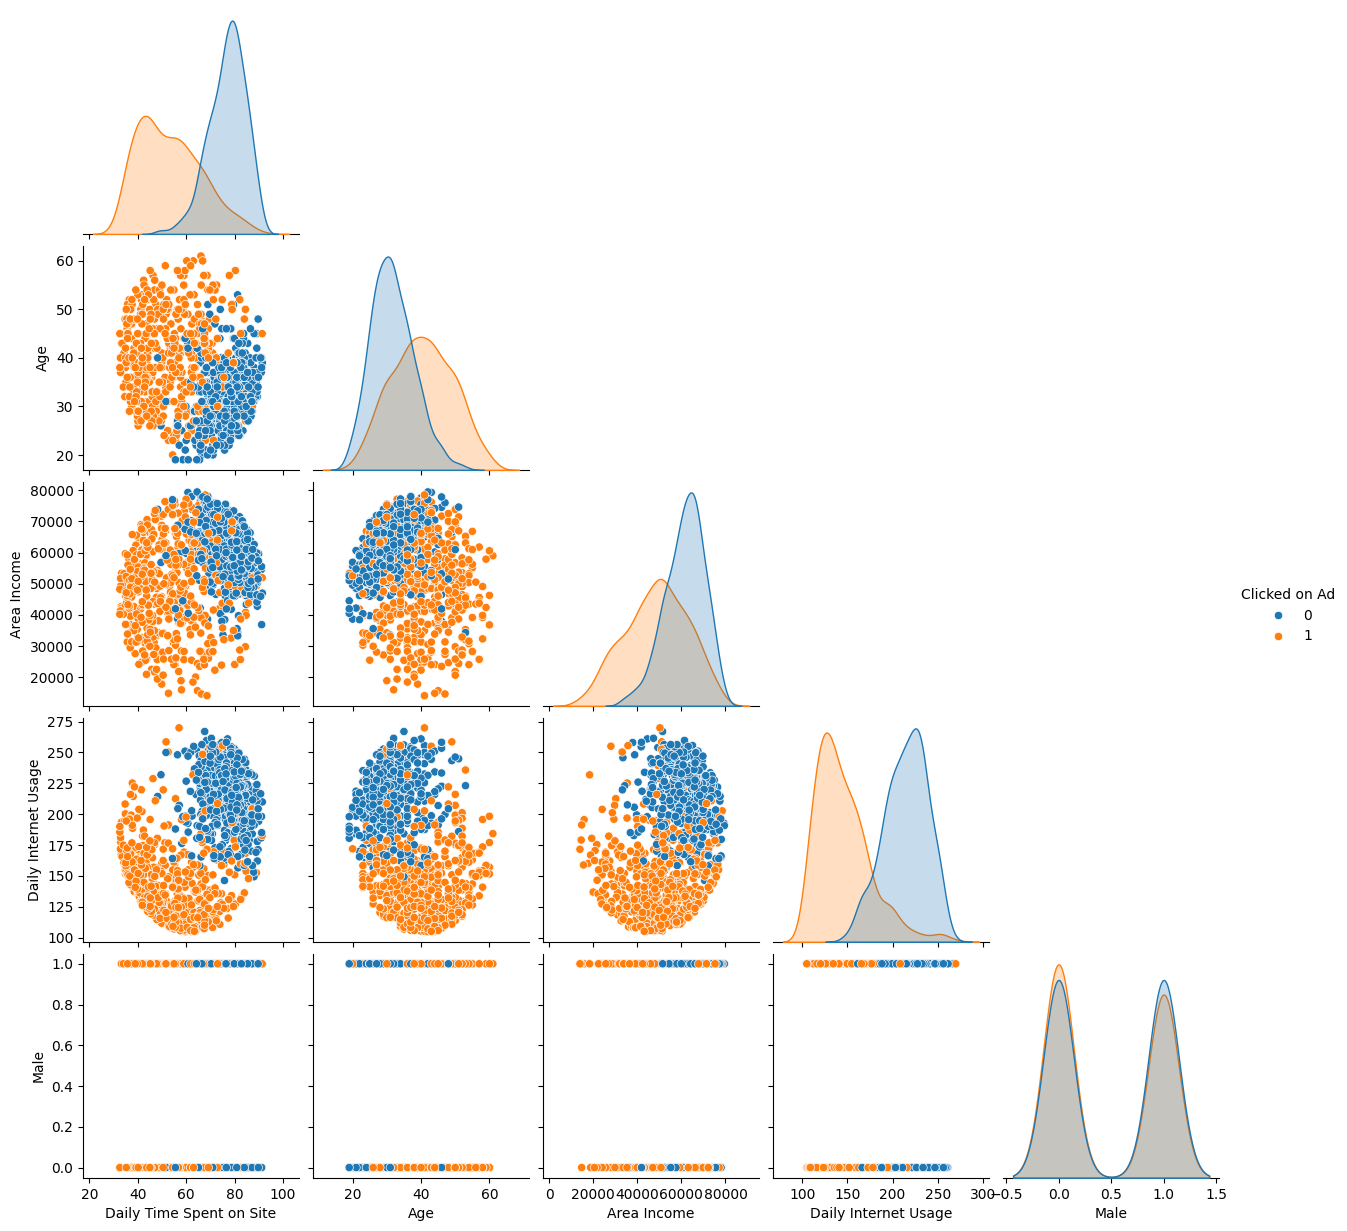

In [122]:
sns.pairplot(df, hue="Clicked on Ad", corner=True);

# <font color='orange'> <b>Modeling</b><font color='black'>  

## <font color='gold'> <b>Train | Test Split</b><font color='black'>  

In [125]:
X = df[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y = df["Clicked on Ad"]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## <font color='gold'> <b>AdaBoost Modeling</b><font color='black'>  

[Sklearn: AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

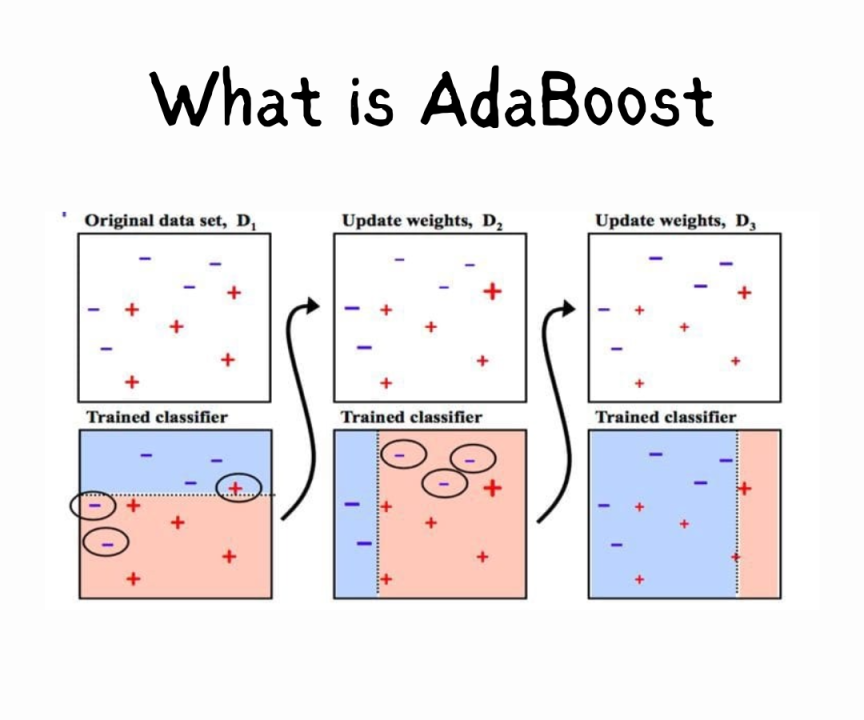

**AdaBoost and Its Working Principle**

AdaBoost (Adaptive Boosting) is an effective ensemble boosting technique used in machine learning. This method trains weak learners (usually simple decision trees) sequentially, combining their strengths and compensating for their weaknesses.

**How AdaBoost Works**
- **Using Weak Learners**: AdaBoost trains each new learner to compensate for the weaknesses of the previous ones by focusing on errors in the dataset.
- **Weighted Learning**: Misclassified data points are given more weight, ensuring subsequent learners focus more on these data points.
- **Team Building**: AdaBoost brings together 'players' (weak learners) with different skills, leveraging their strengths and balancing their weaknesses.

**Implementation of AdaBoost**
AdaBoost trains a sequence of weak learners. At each step, the model focuses on correcting the errors of the previous step. This iterative process improves the overall predictive capability of the model on the dataset.

**An Example of AdaBoost**
Think of AdaBoost as a 'quiz game.' At each step, questions answered incorrectly are given more attention, and the next learner tries to correct those mistakes. This process results in a final prediction that combines the contributions of all the learners.

**Conclusion**
AdaBoost is a powerful method for learning complex and challenging structures in datasets. By learning from the mistakes of each learner, it builds a model that typically performs better than a single learner. This approach enables more accurate and reliable predictions in machine lerning problems.


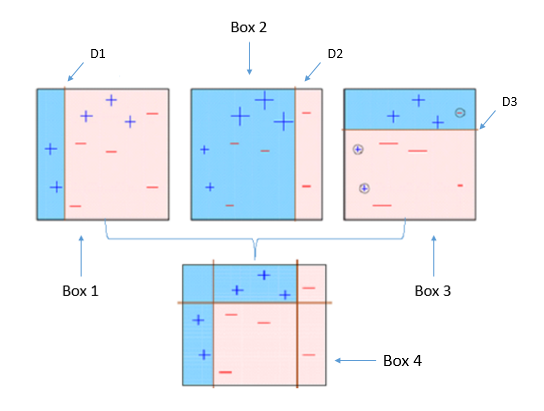

---

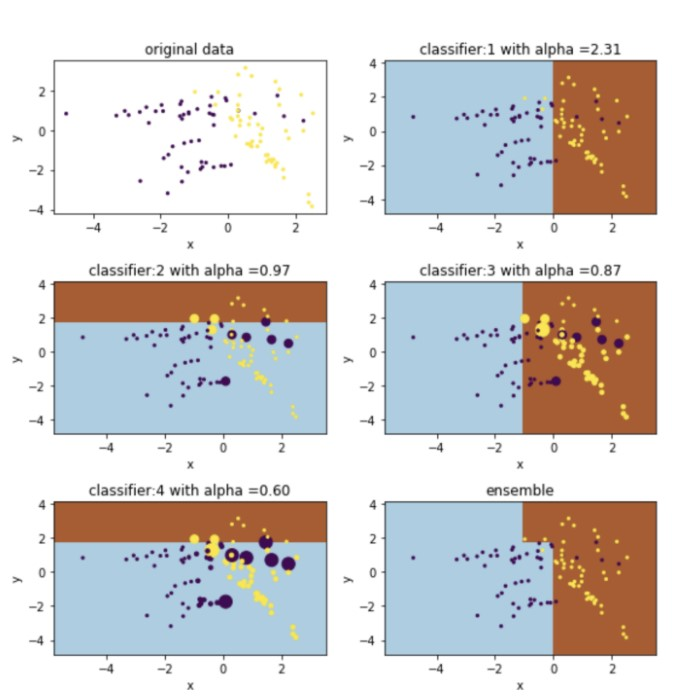

---

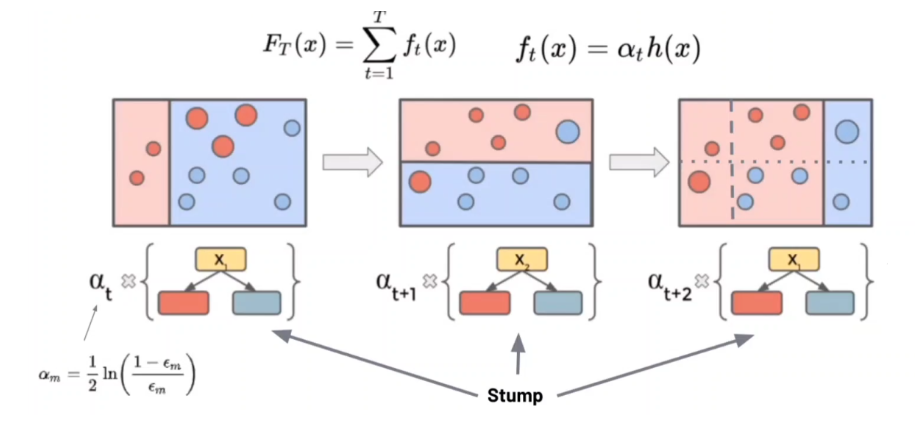

**AdaBoost Algorithm and Parameters**

AdaBoost builds a model using weak learners (commonly referred to as 'stumps'). Each weak learner is trained sequentially, relying on the previous one, and passes information to improve the model's overall performance.

**Parameters and Their Effects**
- **base_estimator**: Determines the weak learner to be used. By default, `DecisionTreeClassifier(max_depth=1)` is used. This parameter specifies which model to use as the weak learner and its complexity.
- **n_estimators**: Defines the number of weak learners to be created. More weak learners often result in better generalization and performance.
- **learning_rate**: Scales each weak learner’s contribution to the final model. A smaller value requires more learners but can be more robust against overfitting.
- **algorithm**: Specifies the algorithm used by AdaBoost. Options include 'SAMME' and 'SAMME.R.'
- **random_state**: Ensures the reproducibility of the model. When a specific value is provided, the model produces the same results every time.

**Working Principle**
AdaBoost assigns higher weights to misclassified observations at each iteration. This process helps the model correct errors and improve overall performance. Each weak learner's predictions are weighted based on its success, and these predictions are combined to form the final prediction.

Balancing these parameters significantly impacts the model's accuracy and generalization ability. Incorrect parameter settings can lead to overfitting or underfitting.

**Comparison of AdaBoost and Random Forest**
- **Random Forest**: Each decision tree is independent and trained on random subsets of data. The final prediction is formed by combining the predictions of all trees.
- **AdaBoost**: Weak learners are interdependent, and each one focuses on improving the previous one. The final prediction is formed by combining the weighted predictions of all learners.

Both approaches offer advantages for different situations and datasets. AdaBoost is particularly effective with weak classifiers and enables the model to learn from errors. Random Forest, on the other hand, reduces high variance by using independent trees, creaing a robust model.


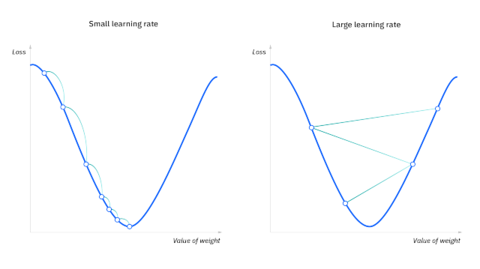

**Understanding and Applying AdaBoost**

To better understand the AdaBoost algorithm, we will experiment by setting the number of trees to 3. This will allow us to observe the fundamental workings of AdaBoost more clearly.

**AdaBoost Workflow**
1. **Tree Creation**: AdaBoost creates trees based on the specified `n_estimators` parameter. In our example, this number is set to 3.
2. **Weighting and Updating**: Each tree focuses on a portion of the observations it predicts correctly while increasing the weight of the misclassified observations. This way, subsequent trees focus more on harder observations.
3. **Scoring**: The scores of each tree are calculated, and AdaBoost uses these scores to make predictions.

**Prediction Method**
- AdaBoost produces a result by weighting the predictions of each tree.
- Unlike Random Forest, AdaBoost considers the weights of the trees. If one class has a higher weight than another, that class is selected.
- This weighting method distinguishes AdaBoost from Random Forest in how predictios are made.


In [136]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [137]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42) # default is n_estimators=50

In [138]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [139]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [140]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.961111
train_accuracy     0.985802
test_precision     0.968795
train_precision    0.996678
test_recall        0.952727
train_recall       0.974471
test_f1            0.960164
train_f1           0.985440
dtype: float64

In [141]:
model = AdaBoostClassifier(n_estimators=3, random_state=42)

model.fit(X_train, y_train)

# a model with only 3 trees will be created and visualized.

AdaBoostClassifier(n_estimators=3, random_state=42)

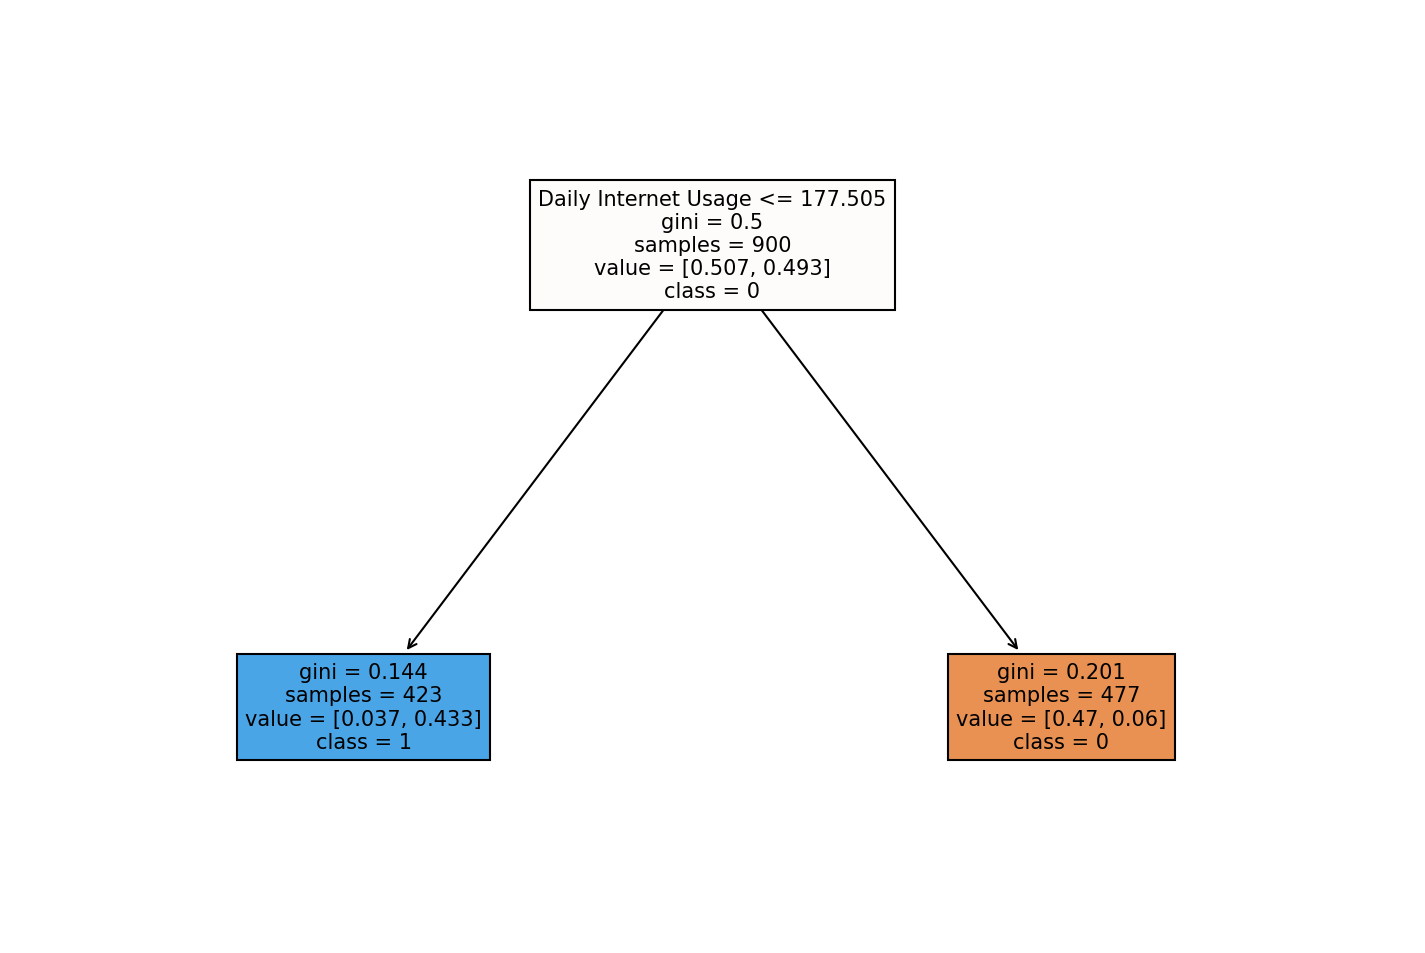

In [142]:
# first tree
targets = df["Clicked on Ad"].astype("str")

plt.figure(figsize=(12,8),dpi=150)

plot_tree(model.estimators_[0],
          filled=True,
          feature_names=X.columns.to_list(),
          class_names=targets.unique().tolist(),
          fontsize=10);

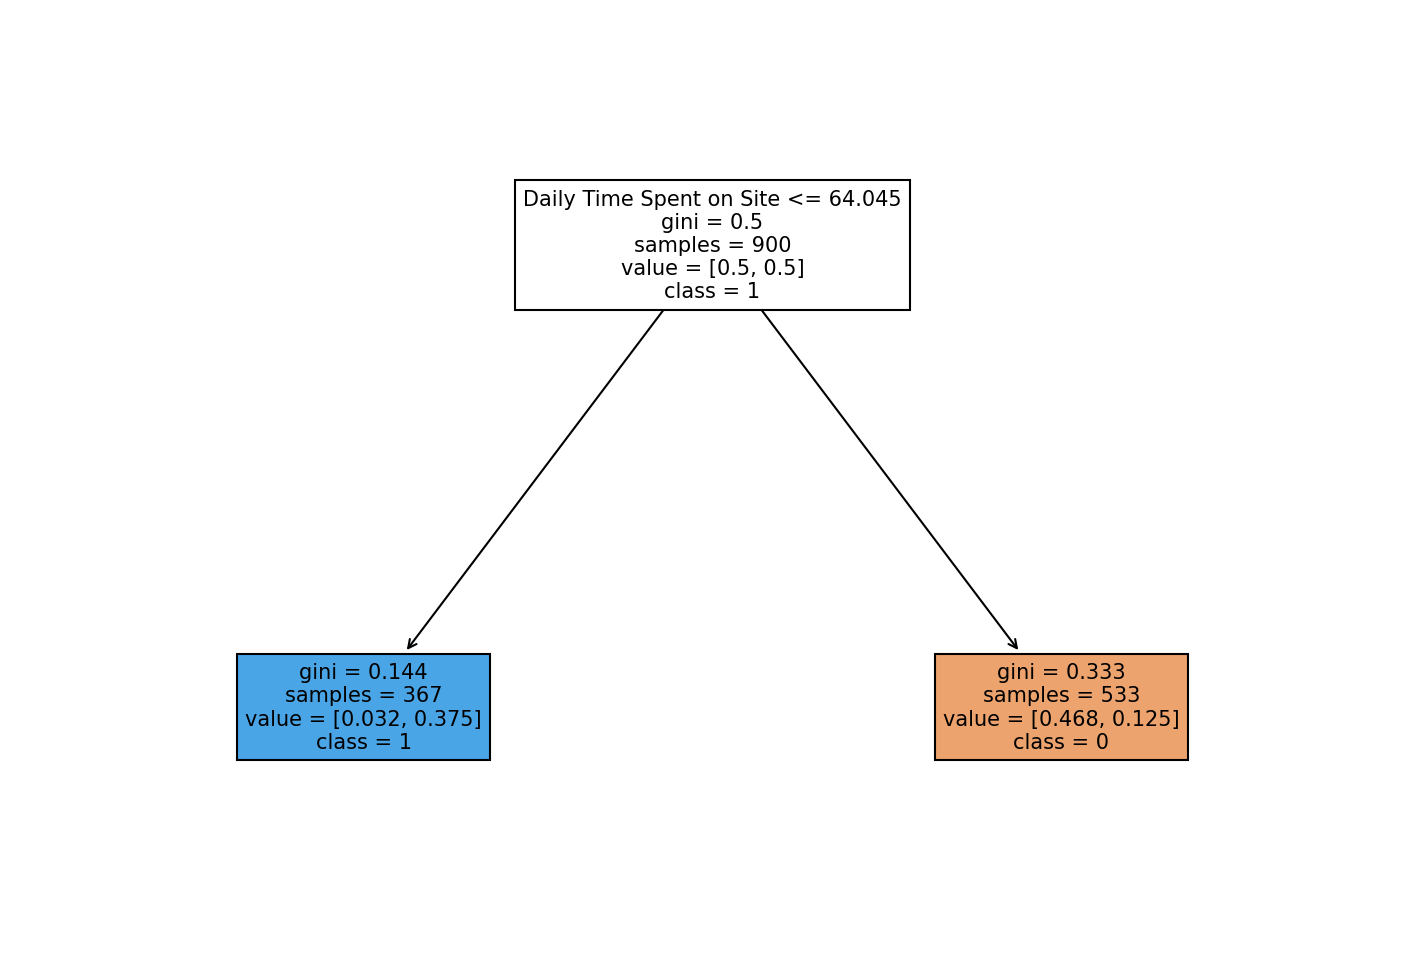

In [143]:
# second tree
targets = df["Clicked on Ad"].astype("str")

plt.figure(figsize=(12,8),dpi=150)

plot_tree(model.estimators_[1],
          filled=True,
          feature_names=X.columns.to_list(),
          class_names=targets.unique().tolist(),
          fontsize=10);

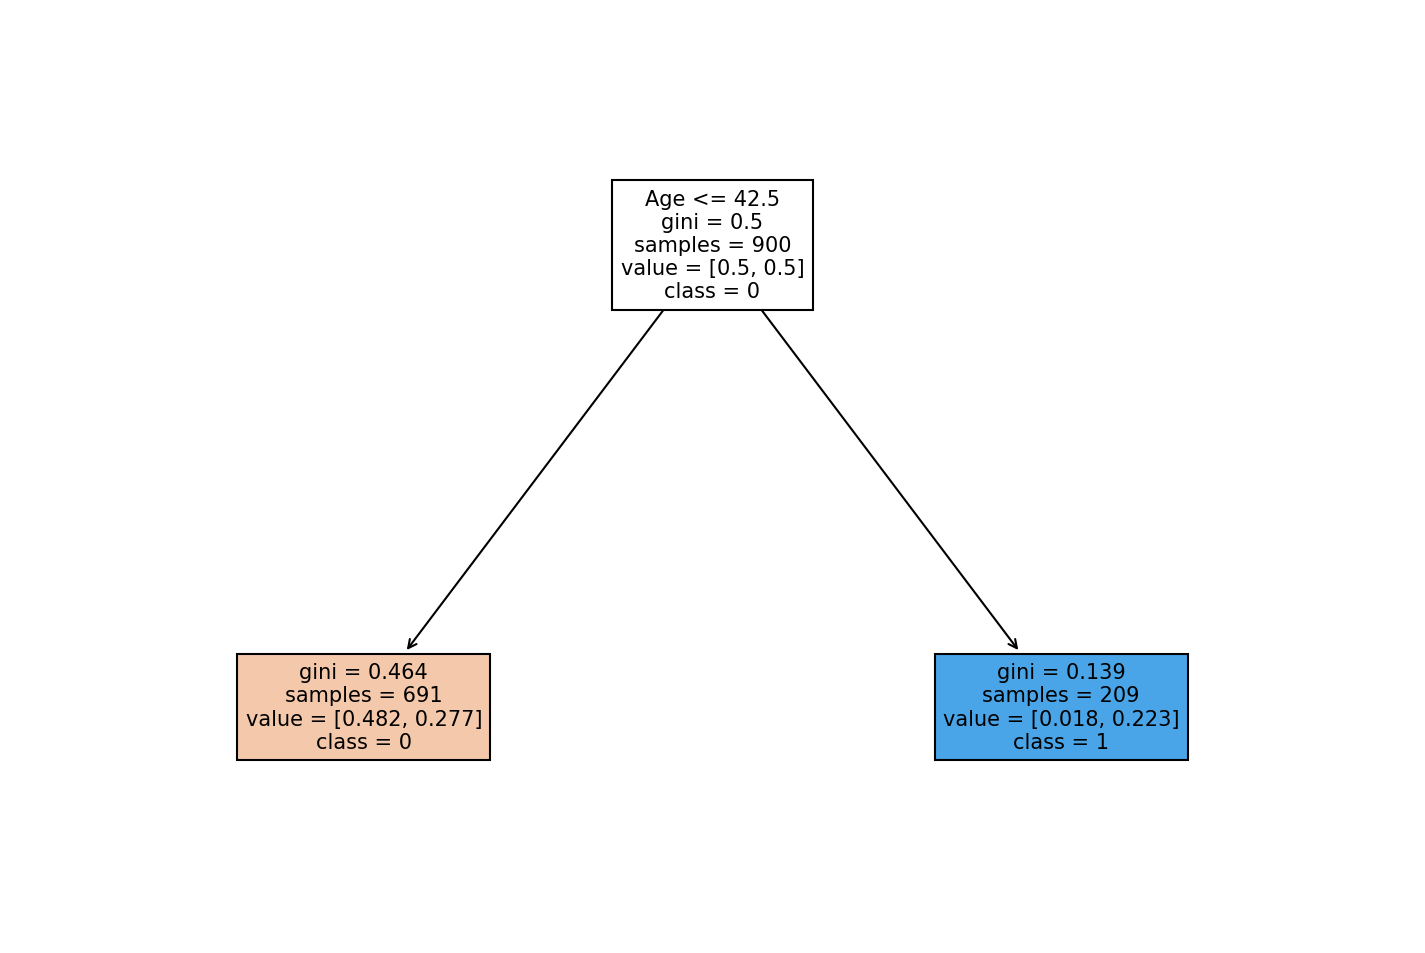

In [144]:
# third tree
targets = df["Clicked on Ad"].astype("str")

plt.figure(figsize=(12,8),dpi=150)

plot_tree(model.estimators_[2],
          filled=True,
          feature_names=X.columns.to_list(),
          class_names=targets.unique().tolist(),
          fontsize=10);

**For a Sample Observation:**

- Daily Time Spent on Site = 68.95  
- Age = 35.0  
- Area Income = 61833  
- Daily Internet Usage = 110  
- Male = 0  

---------------------------------

- **For the 1st tree:** ----> Class 1  
- **For the 2nd tree:** ----> Class 0  
- **For the 3rd tree:** ----> Class 0  

In total, there are 2 votes for class 0 and 1 vote for class 1. **As a result, the predicted class for this observationis class 0.**


---

**Root Node Selection and Learning Rate in AdaBoost**

How does the AdaBoost algorithm select the root node when constructing decision trees, and what is the role of the learning rate? Here's an explanation:

**Root Node Selection**
- AdaBoost selects the feature that provides the best split in the dataset as the root node. This selection is based on the feature with the lowest Gini impurity value.
- In the first tree, all samples are used. For instance, if we have 900 observations classified as 0 and 1, the split is made towards the side with the majority class.
- Misclassified observations are given more weight in the next tree, increasing the probability of correct classification in subsequent iterations.

**Impact of the Learning Rate**
- The learning rate determines the amount of weight assigned to misclassified observations in the next tree. A higher learning rate means more weighted observation transfer.
- The learning rate must be balanced with the number of estimators (`n_estimators`). If the number of trees is small and the learning rate is high, the model may quickly fit the data, potentially leading to overfitting.
- AdaBoost is prone to overfitting when using trees with greater depth (`max_depth`). Therefore, the `max_depth` is generally kept below 2. Increasing the depth can cause the model to overly fit the data, reducing its generalization ability.

These characteristics of AdaBoost are critical for training a model that is both accurate and balanced. Misconfigured parameters can negatively affect model performance and lead to issues such a overfitting.


---

**How Does Scoring Work in AdaBoost?**

How does the AdaBoost algorithm score and weight its trees? Here’s an explanation of the process:

AdaBoost starts by calculating the error rate (`estimator_errors_`) for each tree. Then, these error rates are weighted using the following formula:

**Tree Weight = (1/2) * log((1 - error_rate) / error_rate)**

This formula determines the weight of each tree in the final model. Trees with lower error rates are assigned higher weights, making them more influential in the model's final prediction.

AdaBoost combines the predictions of all trees using these weights. For instance, if a model has three predictions for class '0' and one for class '1', each prediction's weight is considered. Even if the majority class is '0', the final prediction could be '1' if the weight of the '1' prediction is significantly higher.

This weighting mechanism sets AdaBoost apart from other ensemble methods. For example, in Random Forest, each tree makes independent predictions, whereas in AdaBoost, the predictions of each tree are interconnected and weighted to produce a combined prediction.

This weighting process helps AdaBoost enhance its accuracy while reducing the risk of overfitting.


In [148]:
model.estimator_errors_

# The error rate of the first tree is 0.09666667.
# The error rate of the second tree is 0.15660636.
# The error rate of the third tree is 0.29526371.

array([0.09666667, 0.15660636, 0.29526371])

In [149]:
1/2 * np.log((1 - 0.09666667) / 0.09666667) # first tree

# predicted as class 1

1.117411476360216

In [150]:
1/2 * np.log((1 - 0.15660636) / 0.15660636) # second tree

# predicted as class 0

0.8418492023096668

In [151]:
1/2 * np.log((1 - 0.29526371) / 0.29526371) # third tree

# predicted as class 0

0.43497739343711583

In [152]:
0.8418492023096668 + 0.43497739343711583  # Total weights of trees predicting class 0

# Since the weight of the tree predicting class 1 is smaller than the weight of those predicting class 0, the result is prediction class = 0.

1.2768265957467826

**Error Rate Analysis Based on the Number of Trees in AdaBoosting**

The steps for analyzing the error rate in the AdaBoosting algorithm based on the number of trees are as follows:

1. Define a range for the number of trees (Recommended ranges are typically broad values like 50, 100, 250, 500).

2. For each number of trees, create a separate AdaBoost model and train these models on your dataset.

3. Calculate the F1 score for each model and subtract it from 1 to determine the error rate.

4. Plot a line graph showing the relationship between the number of trees (x-axis) and the error rate (y-axis). Use this graph to analyze how the error rate changes as the number of trees increases.

**Key Points to Consider:**

- Choose broad ranges for the number of trees rather than very small values (e.g., 50, 100, 250, 500).
- Identify the lowest point on the graph, as this often corresponds to the best-performing model.
- For large datasets, this process may take time so be patient.


In [154]:
error_rates = []

for n in range(1,300):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

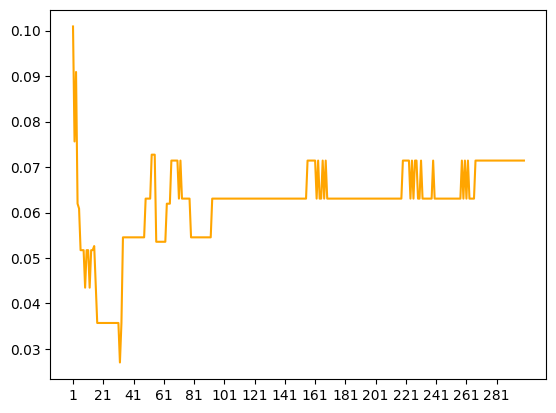

In [156]:
plt.plot(range(1, 300), error_rates, color= 'orange')
plt.xticks(range(1, 300, 20))
plt.show()

**AdaBoost Hyperparameters**

AdaBoost is an algorithm that relies on **weak learners** and can be optimized by carefully tuning its hyperparameters. Below are the key hyperparameters of AdaBoost and their explanations:

---

**Main Hyperparameters**

* **n_estimators:**
  - **Description:** Specifies the total number of weak learners (trees) to use.
  - **Default:** 50
  - **Impact:** More trees generally improve performance but increase the risk of overfitting. Cross-validation can help find the optimal number of trees.

* **learning_rate:**
  - **Description:** Scales the contribution of each weak learner.
  - **Default:** 1.0
  - **Impact:** A lower learning rate (e.g., 0.1) makes the model more stable but requires more trees. A higher learning rate allows faster learning but increases the risk of overfitting.

* **base_estimator (now called estimator in newer versions):**
  - **Description:** The base model to use as a weak learner in AdaBoost.
  - **Default:** DecisionTreeClassifier(max_depth=1)
  - **Impact:** Decision stumps (single-level decision trees) typically perform well but can be replaced with more complex models if needed.

---

**Regularization and Performance Control**

* **algorithm:**
  - **Description:** Specifies the boosting algorithm to use. Options are 'SAMME' and 'SAMME.R.'
  - **Default:** 'SAMME.R'
  - **Impact:** 'SAMME.R' is generally faster and provides better performance.

---

**Performance Optimization**

* **Early Stopping:**
  - **Description:** A technique to stop training if performance does not improve after a certain number of iterations to prevent overfitting.
  - **Default:** Not specified (applied manually).
  - **Impact:** Reduces training time and prevents unnecessary iterations.

---

**Effective Use of AdaBoost Hyperparameters**

**Number of Trees (n_estimators):**  
More trees mean greater learning capacity, but an excessive number can lead to overfitting. Cross-validation can help determine the ideal number of trees.

**Learning Rate:**  
The learning rate determines the contribution of each weak learner. A low value ensures stable learning but requires more iterations. A higher learning rate provides faster results but must be used cautiously to avoid overfitting.

**Base Estimator:**  
Using more complex models (e.g., deeper decision trees) as weak learners is possible, but this increases the risk of overfitting.

**Early Stopping:**  
If performance stops improving after a certain number of iterations during training, early stopping can be applied. This helps reduce overfitting and shortens training time.

---

**Hyperparameter Summary Table**

| **Parameter**       | **Description**                                          | **Default**                      |
|----------------------|----------------------------------------------------------|----------------------------------|
| **n_estimators**     | Total number of trees to use                              | 50                               |
| **learning_rate**    | Determines the contribution of each weak learner          | 1.0                              |
| **base_estimator**   | The base model used as a weak learner                     | DecisionTreeClassifier(max_depth=1) |
| **algorithm**        | The boosting algorithm to use                             | 'SAMME.R'                        |

---

Tuning these hyperparameters is crucial for optimizing the performance of the AdaBoost model. Use **n_estimators** and **learning_rate** in the right combination with **cross-validation** and, if neessary, the **early stopping** technique to achieve the best results.


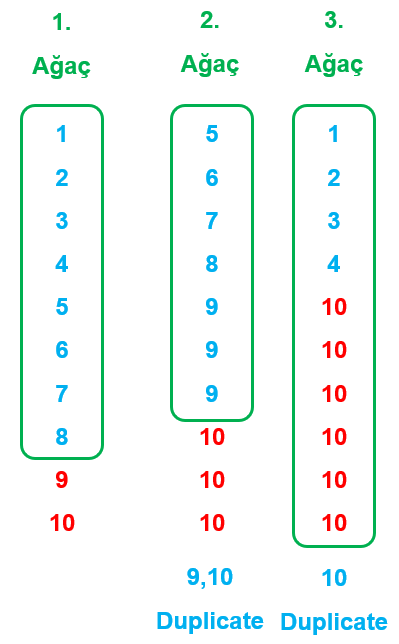

**Incorrect observations are not duplicated, only their weights are increased.**

## <font color='gold'> <b>GridSearchCV</b><font color='black'>  

In [158]:
model = AdaBoostClassifier(random_state=42)

In [160]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1]    
}

In [162]:
ada_grid_model = GridSearchCV(model, param_grid,
                              cv= 5,
                              scoring= "f1"
                             )

In [164]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [166]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [168]:
ada_grid_model.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [170]:
ada_grid_model.best_score_

0.969132103588408

## <font color='gold'> <b>Model Performance</b><font color='black'>  

In [172]:
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [174]:
y_pred = ada_grid_model.predict(X_test)
y_pred_proba = ada_grid_model.predict_proba(X_test)

# process of assigning metrics to variables for comparison
ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:,1])

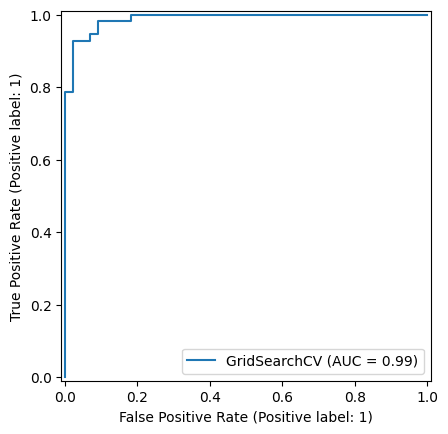

In [176]:
RocCurveDisplay.from_estimator(ada_grid_model, X_test, y_test);

## <font color='gold'> <b>Feature Importance</b><font color='black'>  

In [178]:
model = AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

model.fit(X_train, y_train)

model.feature_importances_

array([0.28, 0.22, 0.21, 0.29, 0.  ])

In [180]:
feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])

ada_imp_feats = feats.sort_values("ada_importance", ascending = False)
ada_imp_feats

,ada_importance
Daily Internet Usage,0.29
Daily Time Spent on Site,0.28
Age,0.22
Area Income,0.21
Male,0.00


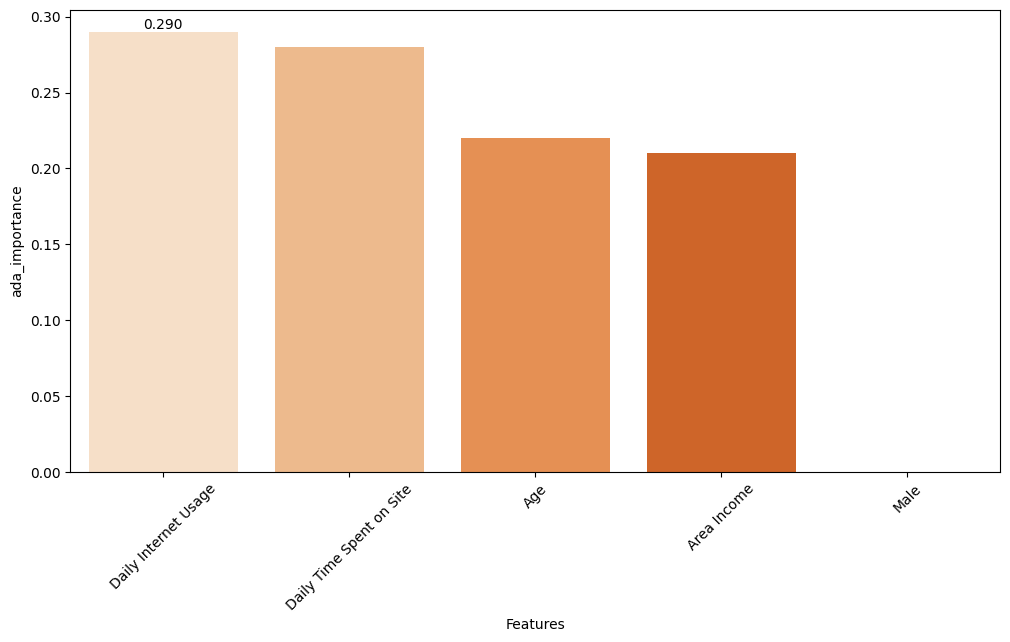

In [199]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_importance', palette='Oranges')
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.xticks(rotation=45)
plt.xlabel("Features");

<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>